# DataFrame

## Titanic data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
from urllib import request
import ssl
import io

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'

context = ssl._create_unverified_context()
response = request.urlopen(url, context=context)
csv = response.read()

titanic = pd.read_csv(io.BytesIO(csv))

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.shape

(891, 15)

In [6]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
# For display purposes, we will drop some columns
titanic = titanic[['survived', 'sex', 'age', 'fare',
                   'embarked', 'class', 'who', 'deck', 'embark_town',]]

In [8]:
titanic.dtypes

survived         int64
sex             object
age            float64
fare           float64
embarked        object
class           object
who             object
deck            object
embark_town     object
dtype: object

### But I really want to see all the data!

In [9]:
import qgrid

grid = qgrid.show_grid(titanic, show_toolbar=True)
grid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Summarizing a data frame

In [10]:
titanic.iloc[0]

survived                 0
sex                   male
age                     22
fare                  7.25
embarked                 S
class                Third
who                    man
deck                   NaN
embark_town    Southampton
Name: 0, dtype: object

In [11]:
titanic.describe()

,survived,age,fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [12]:
titanic.head()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22.0,7.2500,S,Third,man,NaN,Southampton
1,1,female,38.0,71.2833,C,First,woman,C,Cherbourg
2,1,female,26.0,7.9250,S,Third,woman,NaN,Southampton
3,1,female,35.0,53.1000,S,First,woman,C,Southampton
4,0,male,35.0,8.0500,S,Third,man,NaN,Southampton


In [13]:
titanic.tail()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
886,0,male,27.0,13.00,S,Second,man,NaN,Southampton
887,1,female,19.0,30.00,S,First,woman,B,Southampton
888,0,female,NaN,23.45,S,Third,woman,NaN,Southampton
889,1,male,26.0,30.00,C,First,man,C,Cherbourg
890,0,male,32.0,7.75,Q,Third,man,NaN,Queenstown


In [14]:
titanic.columns

Index(['survived', 'sex', 'age', 'fare', 'embarked', 'class', 'who', 'deck',
       'embark_town'],
      dtype='object')

In [15]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

### Indexing

In [16]:
titanic[['sex', 'age', 'class']].head()

,sex,age,class
0,male,22.0,Third
1,female,38.0,First
2,female,26.0,Third
3,female,35.0,First
4,male,35.0,Third


In [17]:
titanic[10:15]

,survived,sex,age,fare,embarked,class,who,deck,embark_town
10,1,female,4.0,16.7000,S,Third,child,G,Southampton
11,1,female,58.0,26.5500,S,First,woman,C,Southampton
12,0,male,20.0,8.0500,S,Third,man,NaN,Southampton
13,0,male,39.0,31.2750,S,Third,man,NaN,Southampton
14,0,female,14.0,7.8542,S,Third,child,NaN,Southampton


In [18]:
titanic.loc[10:15, 'age':'fare']

,age,fare
10,4.0,16.7000
11,58.0,26.5500
12,20.0,8.0500
13,39.0,31.2750
14,14.0,7.8542
15,55.0,16.0000


In [19]:
titanic.iloc[10:15, [1,3,5]]

,sex,fare,class
10,female,16.7000,Third
11,female,26.5500,First
12,male,8.0500,Third
13,male,31.2750,Third
14,female,7.8542,Third


In [20]:
titanic[titanic.age < 2]

,survived,sex,age,fare,embarked,class,who,deck,embark_town
78,1,male,0.83,29.0000,S,Second,child,NaN,Southampton
164,0,male,1.00,39.6875,S,Third,child,NaN,Southampton
172,1,female,1.00,11.1333,S,Third,child,NaN,Southampton
183,1,male,1.00,39.0000,S,Second,child,F,Southampton
305,1,male,0.92,151.5500,S,First,child,C,Southampton
381,1,female,1.00,15.7417,C,Third,child,NaN,Cherbourg
386,0,male,1.00,46.9000,S,Third,child,NaN,Southampton
469,1,female,0.75,19.2583,C,Third,child,NaN,Cherbourg
644,1,female,0.75,19.2583,C,Third,child,NaN,Cherbourg
755,1,male,0.67,14.5000,S,Second,child,NaN,Southampton


### Sorting and ordering data

In [21]:
titanic.sort_index().head()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22.0,7.2500,S,Third,man,NaN,Southampton
1,1,female,38.0,71.2833,C,First,woman,C,Cherbourg
2,1,female,26.0,7.9250,S,Third,woman,NaN,Southampton
3,1,female,35.0,53.1000,S,First,woman,C,Southampton
4,0,male,35.0,8.0500,S,Third,man,NaN,Southampton


In [22]:
titanic.sort_values('age', ascending=True).head()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
803,1,male,0.42,8.5167,C,Third,child,NaN,Cherbourg
755,1,male,0.67,14.5000,S,Second,child,NaN,Southampton
644,1,female,0.75,19.2583,C,Third,child,NaN,Cherbourg
469,1,female,0.75,19.2583,C,Third,child,NaN,Cherbourg
78,1,male,0.83,29.0000,S,Second,child,NaN,Southampton


In [23]:
titanic.sort_values(['survived', 'age'], ascending=[True, True]).head()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
164,0,male,1.0,39.6875,S,Third,child,NaN,Southampton
386,0,male,1.0,46.9000,S,Third,child,NaN,Southampton
7,0,male,2.0,21.0750,S,Third,child,NaN,Southampton
16,0,male,2.0,29.1250,Q,Third,child,NaN,Queenstown
119,0,female,2.0,31.2750,S,Third,child,NaN,Southampton


### Grouping data

In [24]:
sex_class = titanic.groupby(['sex', 'class'])

In [25]:
sex_class.count()

survived  age  fare  embarked  who  deck  embark_town
sex    class                                                        
female First         94   85    94        92   94    81           92
       Second        76   74    76        76   76    10           76
       Third        144  102   144       144  144     6          144
male   First        122  101   122       122  122    94          122
       Second       108   99   108       108  108     6          108
       Third        347  253   347       347  347     6          347

### Why Kate Winslett survived and Leonardo DiCaprio didn’t

In [26]:
df = sex_class.mean()
df['survived']

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

### Of the females who were in first class, count the number from each embarking town

In [27]:
sex_class.get_group(('female', 'First')).groupby('embark_town').count()

,survived,sex,age,fare,embarked,class,who,deck
embark_town,,,,,,,,
Cherbourg,43,43,38,43,43,43,43,35
Queenstown,1,1,1,1,1,1,1,1
Southampton,48,48,44,48,48,48,48,43


### Cross-tabulation

In [28]:
pd.crosstab(titanic.survived, titanic['class'])

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


### We can aslo get multiple summaries at the same time

In [29]:
def my_func(x):
    return np.max(x)

In [30]:
mapped_funcs = {'embarked': 'count', 'age': ('mean', 'median', my_func), 'survived': sum}
sex_class.get_group(('female', 'First')).groupby('embark_town').agg(mapped_funcs)

embarked        age                survived
               count       mean median my_func      sum
embark_town                                            
Cherbourg         43  36.052632   37.0    60.0       42
Queenstown         1  33.000000   33.0    33.0        1
Southampton       48  32.704545   33.0    63.0       46

### Visualizing tables

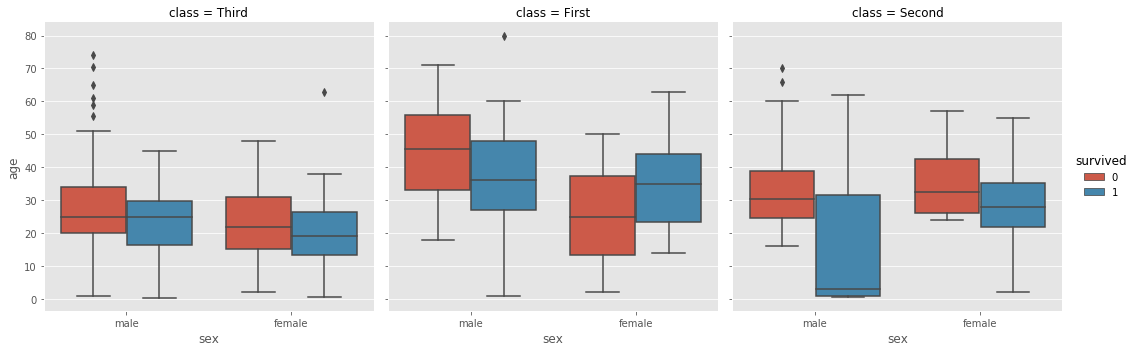

In [31]:
import seaborn as sns

sns.set_context(font_scale=4)
sns.catplot(x='sex', y='age', hue='survived', col='class', kind='box', data=titanic)
pass

### Making plots with pandas

In [32]:
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as web
import datetime